In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [5]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

In [3]:
import seaborn as sns

<Axes: >

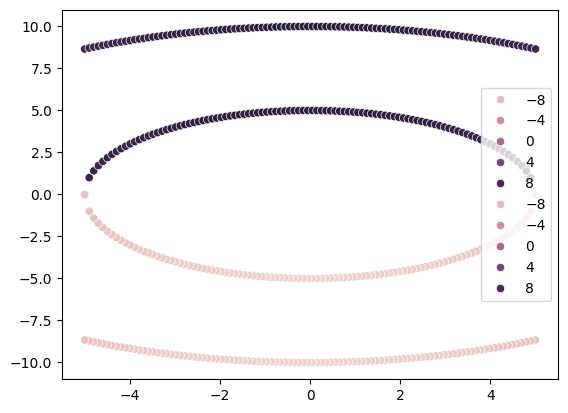

In [7]:
sns.scatterplot(x=x, y=y, hue=y)
sns.scatterplot(x=x1, y=y1, hue=y)

In [8]:
import pandas as pd

In [10]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [16]:
x = df.iloc[:, :2]
y = pd.DataFrame(df.iloc[:, 2])

In [20]:
x

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


In [ ]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.model_selection import GridSearchCV

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())  # ✅ Must be an INSTANCE
])

# Step 3: Create param_grid
param_grid = [
    {
        'svc__kernel': ['linear'],
        'svc__C': np.logspace(-1, 2, 4)  # [0.1, 1, 10, 100]
    },
    {
        'svc__kernel': ['rbf'],
        'svc__C': np.logspace(-1, 2, 4),
        'svc__gamma': np.logspace(-4, 0, 5)  # [1e-4, 1e-3, ..., 1]
    },
    {
        'svc__kernel': ['poly'],
        'svc__C': np.logspace(-1, 2, 4),
        'svc__gamma': ['scale'],
        'svc__degree': [2, 3, 4]
    },
    {
        'svc__kernel': ['sigmoid'],
        'svc__C': np.logspace(-1, 2, 4),
        'svc__gamma': np.logspace(-4, 0, 5)
    }
]

# Step 4: Run GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)


,estimator,"Pipeline(step...svc', SVC())])"
,param_grid,"[{'svc__C': array([ 0.1,... 10. , 100. ]), 'svc__kernel': ['linear']}, {'svc__C': array([ 0.1,... 10. , 100. ]), 'svc__gamma': array([1.e-04...e-01, 1.e+00]), 'svc__kernel': ['rbf']}, ...]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [ ]:
print(grid.best_params_)

{'svc__C': np.float64(0.1), 'svc__gamma': np.float64(1.0), 'svc__kernel': 'rbf'}


In [35]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [40]:
y_pred = grid.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
mean_scores_by_kernel = results.groupby('param_svc__kernel')['mean_test_score'].mean()
print(mean_scores_by_kernel)

param_svc__kernel
linear     0.496667
poly       0.892500
rbf        0.719667
sigmoid    0.513667
Name: mean_test_score, dtype: float64
